# Figure of Sppech Predictor Model

- Using this model one can find which figure of speech is used in a given sentence


## Importing all Dependencies

---
- pandas for data manipulation and analysis.
---
- sklearn (Scikit-learn) for machine learning, including vectorization, model selection, preprocessing, and evaluation.

    *Train-Test Split: It divides your dataset into training and testing subsets, allowing you to train a model on one part and evaluate its performance on another1.*
    *Label Encoder: Converts categorical labels (e.g., text labels) into numerical representations for machine learning models2.*
    *Accuracy Score: Measures the proportion of correctly predicted instances in classification tasks3.*

    *Confusion Matrix: Summarizes the performance of a classification model by showing true positives, true negatives, false positives, and false negatives3.*
    
    *Classification Report: Provides precision, recall, F1-score, and support for each class in a multi-class classification problem3.*
---
- matplotlib and seaborn for data visualization.
---
- nltk for natural language processing (NLP) tasks.

    *Stopwords: Common words (e.g., “the,” “and”) removed during text preprocessing to improve NLP tasks3.*

    *Word Tokenization: Splits text into individual words or tokens for further analysis3.*
---
- tensorflow for deep learning models.

    *Sequential Model: A linear stack of neural network layers, commonly used for deep learning tasks.*

    *Dense Layer: A fully connected neural network layer that performs matrix multiplication and applies an activation function3.*

    *Dropout: Regularization technique that randomly drops some neurons during training to prevent overfitting.*
    
    *Early Stopping: Stops training when a monitored metric (e.g., loss) stops improving, preventing overfitting3.*
---
- sys for system-specific functionality.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sys
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Reading the CSV File

In [3]:
df = pd.read_csv('FOS_CSV.csv', encoding='latin1')

## Preprocessing

In [4]:
df.head()

,Sentences,Figure_OF_Speech
0,"Food? Chris inquired, popping out of his se...",Alliteration
1,Grandpa lounged on the raft in the middle of t...,Alliteration
2,"If seen from above the factory, the workers wo...",Alliteration
3,The truth was like a bad taste on his tongue.,Alliteration
4,The people who still lived in the town were st...,Alliteration


In [5]:
df.isnull().sum()

Sentences           0
Figure_OF_Speech    0
dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of                                               Sentences Figure_OF_Speech
0     Food?  Chris inquired, popping out of his se...     Alliteration
1     Grandpa lounged on the raft in the middle of t...     Alliteration
2     If seen from above the factory, the workers wo...     Alliteration
3         The truth was like a bad taste on his tongue.     Alliteration
4     The people who still lived in the town were st...     Alliteration
...                                                 ...              ...
3780  The sly salesman used circumlocution to avoid ...   Circumlocution
3781  The student used circumlocution in an attempt ...   Circumlocution
3782   In many religious traditions, practitioners u...   Circumlocution
3783   The dark lord Voldemort in the Harry Potter s...   Circumlocution
3784   The best way to avoid inadvertent circumlocut...   Circumlocution

[3785 rows x 2 columns]>

In [7]:
df.shape

(3785, 2)

### Plotting Graphs

#### Enable inline plotting 

In [5]:
if 'ipykernel' in sys.modules:
    %matplotlib inline

#### Plot Bar Graph of Figure of Speech counts

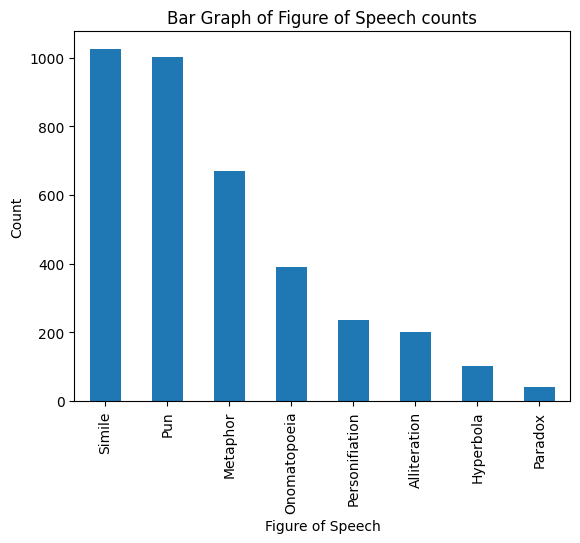

In [8]:
fig, ax = plt.subplots()
df['Figure_OF_Speech'].value_counts().plot(kind='bar', ax=ax)
ax.set_title("Bar Graph of Figure of Speech counts")
ax.set_xlabel("Figure of Speech")
ax.set_ylabel("Count")
plt.show()

#### Plot Pie Chart of Figure of Speech counts

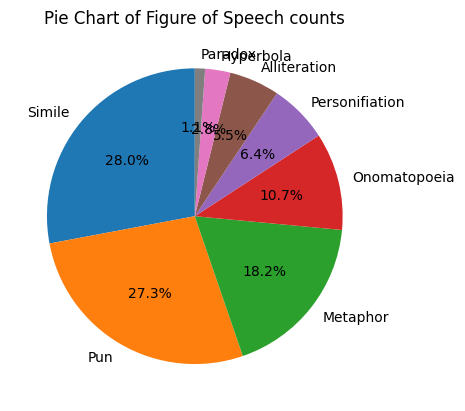

In [9]:
fig, ax = plt.subplots()
df['Figure_OF_Speech'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
ax.set_ylabel('')
ax.set_title("Pie Chart of Figure of Speech counts")
plt.show()

### Tokenization and Vectorization

In [3]:
stop_words = set(stopwords.words('english'))

### Define a function for text preprocessing

- here we are removing all the numn=bers and stopwords present in every sentence of the dataset
- stopwords are the uninformative words, such as common prepositions, conjunctions, and articles, don’t add substantial meaning to the text

In [4]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(filtered_tokens)

### Apply preprocessing to the sentences

In [6]:
df['processed_sentence'] = df['Sentences'].apply(preprocess_text)

### Encode the 'processed_sentence' column using TF-IDF Vectorizer

- TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how important a word is to a document in a collection of documents1.
- Term Frequency (TF): Measures the relative frequency of a term within a document. It’s calculated as the raw count of the term divided by the total number of terms in the document.
- Inverse Document Frequency (IDF): Quantifies the specificity of a term by considering how often it appears across all documents. Rare terms receive higher IDF scores, while common terms get lower scores.

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_sentence']).toarray()

### Label encode the 'Figure of Speech' column

- Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format1.

In [8]:
le = LabelEncoder()
y = le.fit_transform(df['Figure_OF_Speech'])

## Splitting the data into train and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building a simple neural network model

In [10]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))

c:\Users\91778\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Define early stopping

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

### Train the model

- Here we are training the model to enhance its accuracy
- epochs refer to the number of times the entire training dataset is passed through the model during training1.
- batch_size: The number of samples processed in each iteration (mini-batch) during training. 
- validation_split: The proportion of training data to use for validation during training. 
- callbacks: A list of callback functions to apply during training. The early_stopping callback stops training if a monitored metric (e.g., loss) stops improving. 

In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2331 - loss: 2.0219 - val_accuracy: 0.3390 - val_loss: 1.7212
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3375 - loss: 1.7151 - val_accuracy: 0.5094 - val_loss: 1.6225
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4643 - loss: 1.5411 - val_accuracy: 0.5673 - val_loss: 1.4400
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6316 - loss: 1.1828 - val_accuracy: 0.6167 - val_loss: 1.2748
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7565 - loss: 0.8407 - val_accuracy: 0.6440 - val_loss: 1.2062
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8134 - loss: 0.6407 - val_accuracy: 0.6286 - val_loss: 1.2038
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8671 - loss: 0.4701 - val_accuracy: 0.6252 - val_loss: 1.2271
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9008 - loss: 0.3539 - val_accuracy: 0.6303 - val_los

#### Evaluate the model

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy:.2f}")
print("Test Loss: ", loss)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5571 - loss: 1.4901 
Neural Network Accuracy: 0.54
Test Loss:  1.568411946296692


#### Predictions

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


## Classification report

- y_test: These are the true labels (ground truth) for the test data.
- y_pred_classes: These are the predicted class labels produced by the model for the test data.
- target_names: A list of class names (labels) corresponding to the different classes in the problem. It helps label the rows in the classification report.

In [16]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))


Classification Report:

                precision    recall  f1-score   support

  Alliteration       0.06      0.02      0.03        48
     Hyperbola       0.00      0.00      0.00        24
      Metaphor       0.45      0.52      0.48       126
  Onomatopoeia       0.54      0.42      0.47        71
       Paradox       0.00      0.00      0.00        10
Personifiation       0.64      0.30      0.41        60
           Pun       0.67      0.70      0.68       198
        Simile       0.51      0.72      0.59       197

      accuracy                           0.54       734
     macro avg       0.36      0.33      0.33       734
  weighted avg       0.50      0.54      0.51       734



c:\Users\91778\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91778\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91778\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Confusion matrix

- cm: This is the confusion matrix you’ve calculated (usually a 2D array) containing true positive, true negative, false positive, and false negative counts for each class.
- annot=True: This parameter enables displaying the actual values within each cell of the heatmap.
- fmt='d': It specifies the format for displaying the values (in this case, as integers).
- cmap='Blues': The color map used for the heatmap. In this case, it’s a blue color scheme.
- xticklabels and yticklabels: These parameters allow you to label the x-axis and y-axis with class names (labels) from your le.classes_.

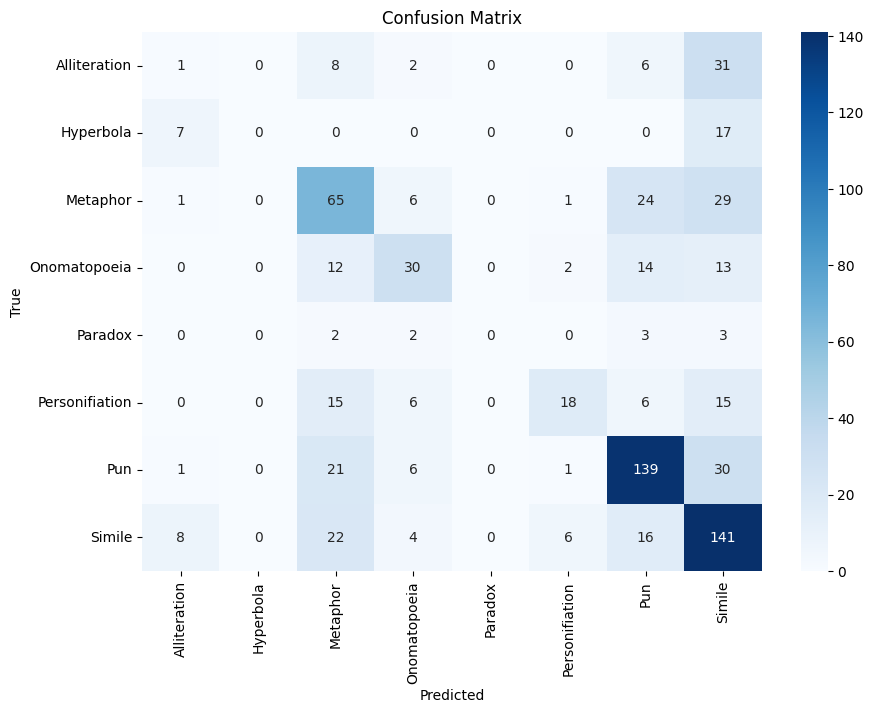

In [17]:
cm = confusion_matrix(y_test, y_pred_classes)
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

## Function to predict figure of speech for a given sentence

In [18]:
def predict_figure_of_speech(sentence):
    processed_sentence = preprocess_text(sentence)
    processed_vector = vectorizer.transform([processed_sentence]).toarray()
    prediction = model.predict(processed_vector)
    predicted_label = le.inverse_transform([prediction.argmax()])[0]
    return predicted_label

## Taking user input to predict

In [19]:
# # Do not run this part of the code in ipynb file use the .py file 
# user_input = input("Write you sentence here: ")
# predicted_figure_of_speech = predict_figure_of_speech(user_input)
# print(f"The figure of speech in '{user_input}' is: {predicted_figure_of_speech}")